# LatLonProfiles diagnostic - Multiple lines profiles

The aim of this diagnostic is to visualise latitudinal or longitudinal profiles of a certain variable. In addition, plots are allowed to have multiple lines and/or show the seasonal and annual means of the selected variable.

Specifically, in this notebook we look at the code for example plots of a multiple lines zonal profiles (along with the reference data).

In [1]:
%reload_ext autoreload
%autoreload 2

Let's start with the import of the classes `LatLonProfiles` and `PlotLatLonProfiles`:

In [2]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

/LUMI_TYKKY_IZ4yJl9/miniforge/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We generate a number of dictionaries, `dataset_dict`, including the options for the data we want to plot in this notebook.
A reference profile to be plotted along with the input dataset is optional. If chosen, `obs_dict` is necessary. 
Lastly, the dictionaries `common_dict` include the common features for both datasets (input and reference) in case of historical data and in case of future scenarios, such as start and end dates.

In this notebook, we will look at climate model outputs coming from both ICON and IFS-NEMO, and from 1990 to 1999 (historical) and 2030-2039 (future scenarios)

Dictionaries also contain the optional `region` parameter, to select a specific area of interest. List of available default regions are Tropics, Europe, North Midlatitudes (from 30 to 90 N) and South Midlatitudes.

In [3]:
dataset_dict_1 = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}

dataset_dict_2 = {'catalog': 'climatedt-phase1',
                  'model': 'ICON',
                  'exp': 'ssp370',
                  'source': 'lra-r100-monthly'}

dataset_dict_3 = {'catalog': 'climatedt-phase1',
                  'model': 'IFS-NEMO',
                  'exp': 'historical-1990',
                  'source': 'lra-r100-monthly'}

dataset_dict_4 = {'catalog': 'climatedt-phase1',
                  'model': 'IFS-NEMO',
                  'exp': 'ssp370',
                  'source': 'lra-r100-monthly'}

common_dict_hist = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'region': 'tropics',
               'loglevel': 'info'}

common_dict_ssp = {'startdate': '2030-01-01',
                   'enddate': '2039-12-31',
                   'region': 'tropics',
                   'loglevel': 'info'}

obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}

We hence generate an object of the `LatLonProfiles` class for each line, and we decide to plot zonal profiles as an example. This means that the code will be performing the zonal mean, by averaging across the longitudes. 

The analysed variable for this notebook will be `tprate` (Total Precipitation Rate, expressed in mm/day).

By default, the `mean_type` parameter in set as 'zonal' (so the profile will be zonal even without a specific `mean_type` setting), but to visualise the meridional profile, one can just set `mean_type='meridional'`. We also generate another LatLonProfiles object for the reference zonal profile.

The `std=True` option computes the standard deviation and is optional. We set it as `True` for the ERA5 reference profile to enable uncertainty shading in plots via `ref_std_data`. While model data can also compute std, only reference std shading is directly supported for plotting simplicity.

In [4]:
lonlat_dataset_1 = LatLonProfiles(**dataset_dict_1, **common_dict_hist, mean_type='zonal')
lonlat_dataset_2 = LatLonProfiles(**dataset_dict_2, **common_dict_ssp)
lonlat_dataset_3 = LatLonProfiles(**dataset_dict_3, **common_dict_hist)
lonlat_dataset_4 = LatLonProfiles(**dataset_dict_4, **common_dict_ssp)

lonlat_obs = LatLonProfiles(**obs_dict, **common_dict_hist, mean_type='zonal')

run_dict = {'var': 'tprate',
            'units': 'mm/day'}

lonlat_dataset_1.run(**run_dict)
lonlat_dataset_2.run(**run_dict)
lonlat_dataset_3.run(**run_dict)
lonlat_dataset_4.run(**run_dict)

lonlat_obs.run(**run_dict, std=True)

2025-11-13 14:26:09 :: LatLonProfiles :: INFO     -> Region Tropics found, using lon: [-180, 180], lat: [-15, 15]
2025-11-13 14:26:09 :: LatLonProfiles :: INFO     -> Region Tropics found, using lon: [-180, 180], lat: [-15, 15]
2025-11-13 14:26:09 :: LatLonProfiles :: INFO     -> Region Tropics found, using lon: [-180, 180], lat: [-15, 15]
2025-11-13 14:26:09 :: LatLonProfiles :: INFO     -> Region Tropics found, using lon: [-180, 180], lat: [-15, 15]
2025-11-13 14:26:09 :: LatLonProfiles :: INFO     -> Region Tropics found, using lon: [-180, 180], lat: [-15, 15]
2025-11-13 14:26:09 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for tprate
2025-11-13 14:26:09 :: LatLonProfiles :: INFO     -> Retrieving data for variable tprate
2025-11-13 14:26:09 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-11-13 14:26:10 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-11-13 14:26:10 :: Fixer :: INFO     -> Fix

Different types of dataset can be managed and plotted via `LatLonProfiles` and `PlotLatLonProfiles`: 
- Seasonal mean, with season choice between DJF, MAM, JJA and SON
- Annual mean

## Single plot - Seasonal means

LatLonProfiles objects include the seasonal mean for each season. For this example, we plot the winter DJF means (selected via the [0] option), along with the winter ERA5 reference data as well as the standard deviation shadings. 

Standard deviation shading is enabled for the ERA5 reference data via `ref_std_data`, providing uncertainty bands that aid in model validation. The plotting code follows:

2025-11-13 14:29:25 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-11-13 14:29:25 :: create_folder :: INFO     -> Folder ./png already exists
2025-11-13 14:29:25 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.tropics.png
2025-11-13 14:29:25 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.tropics.png
2025-11-13 14:29:25 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


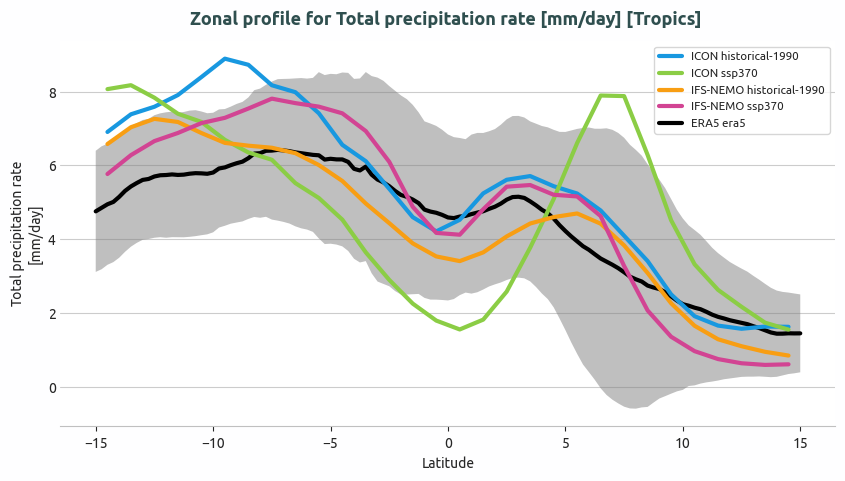

In [5]:
# Use seasonal data (DJF - winter as example)
multi_line_plot = PlotLatLonProfiles(
    data=[lonlat_dataset_1.seasonal[0],        # ICON tprate - DJF 1990-1999
          lonlat_dataset_2.seasonal[0],        # ICON tprate - DJF 2030-2039
          lonlat_dataset_3.seasonal[0],        # IFS-NEMO tprate - DJF 1990-1999
          lonlat_dataset_4.seasonal[0]],       # IFS-NEMO tprate - DJF 2030-2039
    ref_data=lonlat_obs.seasonal[0],  # ERA5 Reference tprate - DJF 1990-1999
    data_type='longterm',
    ref_std_data=lonlat_obs.std_seasonal[0],  # DJF std for ERA5 Reference tprate
    loglevel='INFO'
)

title = "DJF Total precipitation rate comparison in the past and in the future for CMIP6 models"
multi_line_plot.run()

We hence use the PlotLatLonProfiles class to finalise the example plots, starting from the annual means and concluding with the seasonal means.

## Single plot - Annual means

The logic is the same as the previous plot, only changing the `.seasonal` object with `.longterm`:

2025-11-13 14:29:25 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles
2025-11-13 14:29:25 :: create_folder :: INFO     -> Folder ./png already exists


2025-11-13 14:29:26 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.tropics.png
2025-11-13 14:29:26 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.tropics.png
2025-11-13 14:29:26 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


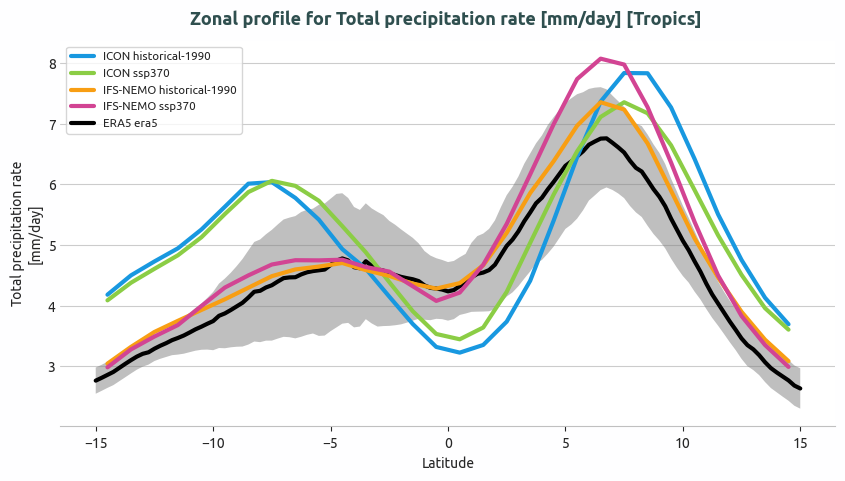

In [6]:
# Create separate annual plot for multi-data
annual_multi_data = [
    lonlat_dataset_1.longterm,        # ICON tprate - 1990-1999
    lonlat_dataset_2.longterm,        # ICON tprate - 2030-2039
    lonlat_dataset_3.longterm,        # IFS-NEMO tprate - 1990-1999
    lonlat_dataset_4.longterm,        # IFS-NEMO tprate - 2030-2039
]

annual_multi_plot = PlotLatLonProfiles(
    data=annual_multi_data,
    ref_data=lonlat_obs.longterm,
    data_type='longterm',
    ref_std_data=lonlat_obs.std_annual,  # Annual std for ERA5 Reference tprate
    loglevel='INFO'
)

# Run the annual multi plot
annual_multi_plot.run()

## Multiple plot - Seasonal mean profiles

As for the annual mean plot, same logic applies also for seasonal profiles:

2025-11-13 14:29:26 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-11-13 14:29:26 :: create_folder :: INFO     -> Folder ./png already exists
2025-11-13 14:29:27 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.seasonal_zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.tropics.png
2025-11-13 14:29:27 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.seasonal_zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.tropics.png
2025-11-13 14:29:27 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


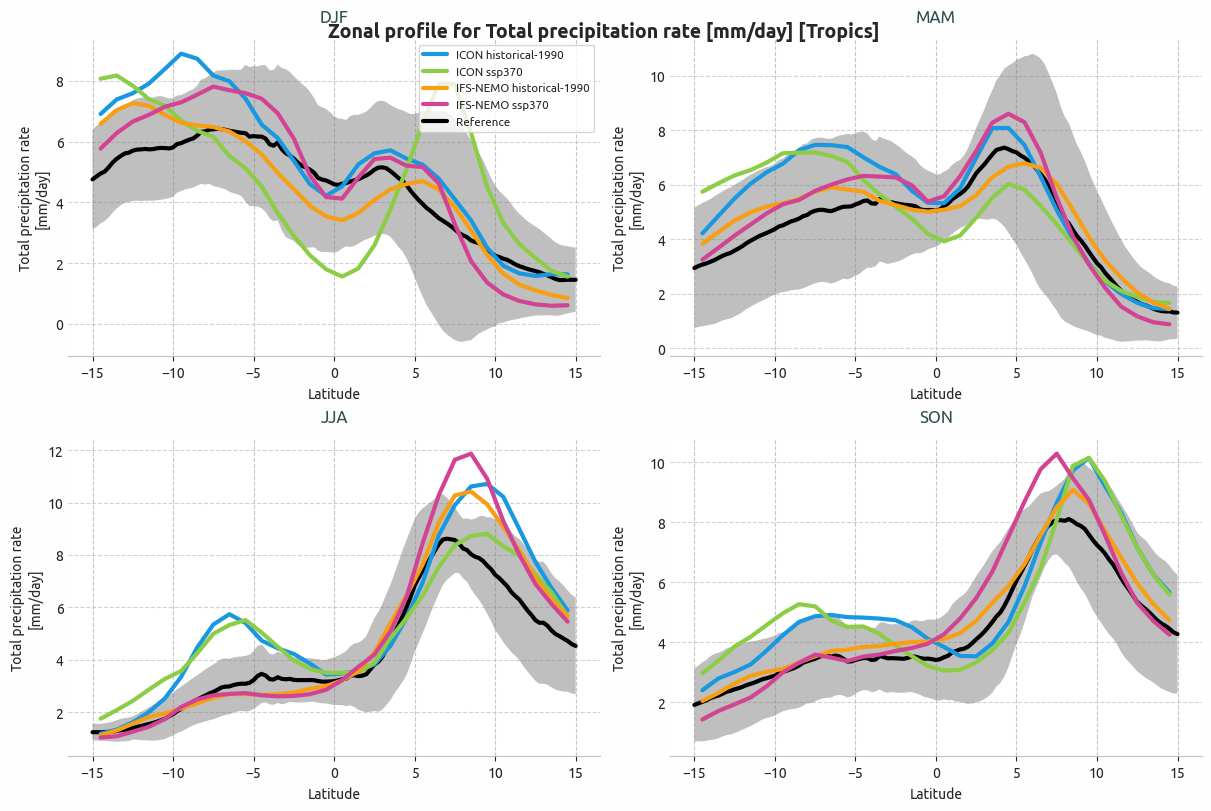

In [7]:
# Prepare model data for 4 seasons
combined_seasonal_model_data = []
combined_seasonal_ref_data = []

for i in range(4):  # DJF, MAM, JJA, SON
    combined_seasonal_model_data.append([
        lonlat_dataset_1.seasonal[i],    # ICON tprate - 1990-1999 - season i
        lonlat_dataset_2.seasonal[i],    # ICON tprate - 2030-2039 - season i
        lonlat_dataset_3.seasonal[i],    # IFS-NEMO tprate - 1990-1999 - season i
        lonlat_dataset_4.seasonal[i],    # IFS-NEMO tprate - 2030-2039 - season i
    ])
    combined_seasonal_ref_data.append(lonlat_obs.seasonal[i])

# Prepare std data for reference only
multi_ref_std_data = [lonlat_obs.std_seasonal[i] for i in range(4)]

# Create 4-panel seasonal plot with multiple variables
seasonal_multi_plot = PlotLatLonProfiles(
    data=combined_seasonal_model_data,
    ref_data=combined_seasonal_ref_data, 
    ref_std_data=multi_ref_std_data,
    data_type='seasonal',
    loglevel='INFO'
)

# Run the seasonal plot (multi_var_labels is already defined in the previous cell)
seasonal_multi_plot.run()